##### Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Importando os Dados

In [2]:

df = pd.read_excel('dados.xlsx')


In [3]:
print(df)

      Unnamed: 0                   Município  IDH-M
0              0                 Maceió (AL)  0,721
1              1                 Satuba (AL)  0,660
2              2              Arapiraca (AL)  0,649
3              3              Rio Largo (AL)  0,643
4              4       Marechal Deodoro (AL)  0,642
...          ...                         ...    ...
1789        1789          Tomar do Geru (SE)  0,551
1790        1790  Santa Luzia do Itanhy (SE)  0,545
1791        1791           Brejo Grande (SE)  0,540
1792        1792      Riachão do Dantas (SE)  0,539
1793        1793           Poço Redondo (SE)  0,529

[1794 rows x 3 columns]


##### Corrigindo Dados

Dropando uma coluna Inútil 

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
print(df)

                       Município  IDH-M
0                    Maceió (AL)  0,721
1                    Satuba (AL)  0,660
2                 Arapiraca (AL)  0,649
3                 Rio Largo (AL)  0,643
4          Marechal Deodoro (AL)  0,642
...                          ...    ...
1789          Tomar do Geru (SE)  0,551
1790  Santa Luzia do Itanhy (SE)  0,545
1791           Brejo Grande (SE)  0,540
1792      Riachão do Dantas (SE)  0,539
1793           Poço Redondo (SE)  0,529

[1794 rows x 2 columns]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Município  1794 non-null   object
 1   IDH-M      1794 non-null   object
dtypes: object(2)
memory usage: 28.2+ KB


Trocando as "," por "." e alterando o Tipo de Dado da Coluna "IDH-M" para Float

In [7]:
df['IDH-M'] = df['IDH-M'].str.replace(',', '.').astype(float)

##### Quais os Maiores IDH-M do Nordeste?

In [11]:
df_sortedtop = df.sort_values(by='IDH-M', ascending=False)
top_50_idh = df_sortedtop.head(50)
print(top_50_idh)

                         Município  IDH-M Estado
1143      Fernando de Noronha (PE)  0.788     PE
1144                   Recife (PE)  0.772     PE
1719                  Aracaju (SE)  0.770     SE
703                  São Luís (MA)  0.768     MA
1552               Parnamirim (RN)  0.766     RN
920               João Pessoa (PB)  0.763     PB
1553                    Natal (RN)  0.763     RN
102                  Salvador (BA)  0.759     BA
103          Lauro de Freitas (BA)  0.754     BA
519                 Fortaleza (CE)  0.754     CE
1328                 Teresina (PI)  0.751     PI
921                  Cabedelo (PB)  0.748     PB
1145                   Olinda (PE)  0.735     PE
1146                 Paulista (PE)  0.732     PE
704                Imperatriz (MA)  0.731     MA
705            Paço do Lumiar (MA)  0.724     MA
0                      Maceió (AL)  0.721     AL
104                 Barreiras (BA)  0.721     BA
922            Campina Grande (PB)  0.720     PB
1554                

##### Quais os Menores IDH-M do Nordeste?

In [12]:
df_sortedbot = df.sort_values(by='IDH-M', ascending=True)
bot_50_idh = df_sortedbot.head(50)
print(bot_50_idh)

                                 Município  IDH-M Estado
919                   Fernando Falcão (MA)  0.443     MA
918                    Marajá do Sena (MA)  0.452     MA
101                            Inhapi (AL)  0.484     AL
1551  São Francisco de Assis do Piauí (PI)  0.485     PI
518                         Itapicuru (BA)  0.486     BA
1327                           Manari (PE)  0.487     PE
1550                          Caxingó (PI)  0.488     PI
1549                 Betânia do Piauí (PI)  0.489     PI
917              Jenipapo dos Vieiras (MA)  0.490     MA
100                          Olivença (AL)  0.493     AL
916                         Satubinha (MA)  0.493     MA
1548                            Cocal (PI)  0.497     PI
1547                  Cocal dos Alves (PI)  0.498     PI
1546                Assunção do Piauí (PI)  0.499     PI
915             Água Doce do Maranhão (MA)  0.500     MA
1545                Tamboril do Piauí (PI)  0.501     PI
914          Lagoa Grande do Ma

###### Mapeando Qual Estado Tem Mais Municípios Entre os 50 Melhores IDH-M

In [13]:
df['Estado'] = df['Município'].str.extract(r'\((\w{2})\)')

topcount_estado = top_50_idh['Estado'].value_counts()

print(topcount_estado)
print("Estado com mais Municípios entre os 50 Melhores IDHs:", topcount_estado.index[0])


BA    14
PE     8
RN     6
CE     6
MA     5
PB     5
PI     4
SE     1
AL     1
Name: Estado, dtype: int64
Estado com mais Municípios entre os 50 Melhores IDHs: BA


###### Mapeando Qual Estado Tem Mais Municípios Entre os 50 Piores IDH-M

In [14]:
df['Estado'] = df['Município'].str.extract(r'\((\w{2})\)')

botcount_estado = bot_50_idh['Estado'].value_counts()

print(botcount_estado)
print("Estado com mais Municípios entre os 50 Piores IDHs:", botcount_estado.index[0])

PI    18
MA    13
AL     7
BA     7
PE     3
PB     2
Name: Estado, dtype: int64
Estado com mais Municípios entre os 50 Piores IDHs: PI


###### Quantos Municipios Tem um Baixo Desenvolvimento Humano

Para ser Considerado um Baixo Desenvolvimento Humano o IDH-M deve ser <=0,499

In [15]:
df_bot = df[df['IDH-M'].astype(float) <= 0.499]

df['Estado'] = df['Município'].str.extract(r'\((\w{2})\)')

df_sortedbot = df_bot.sort_values(by='IDH-M')

botcount_estado = df_sortedbot['Estado'].value_counts()

print(botcount_estado)
print("Total de Municípios com baixo IDH-M:", len(df_bot))
print("Estado com mais Municípios Baixo IDH-M :", botcount_estado.index[0])

total_municipios = 1794
municipios_idh_medio = len(df_bot)
porcentagem_idh_medio = (municipios_idh_medio / total_municipios) * 100
print(f"A porcentagem de Municípios com IDH-M baixo em relação ao total de Municipios é de {porcentagem_idh_medio:.2f}%")



PI    6
MA    4
AL    2
BA    1
PE    1
Name: Estado, dtype: int64
Total de Municípios com baixo IDH-M: 14
Estado com mais Municípios Baixo IDH-M : PI
A porcentagem de Municípios com IDH-M baixo em relação ao total de Municipios é de 0.78%


###### Quantos Municipios Tem um Desenvolvimento Humano Médio

Para ser Considerado um Desenvolvimento Humano Médio o IDH-M deve estar entre 0,5 e 0,799

In [16]:
df_filt = df.query('0.5 <= `IDH-M` <= 0.799').copy()

df_filt['Estado'] = df_filt['Município'].str.extract(r'\((\w{2})\)')

medio_estado = df_filt['Estado'].value_counts()

print(medio_estado)
print("Total de Municípios com IDH Médio:", len(df_filt))
print("Estado com mais Municípios com IDH Médio:", medio_estado.index[0])


total_municipios = 1794
municipios_idh_medio = len(df_filt)
porcentagem_idh_medio = (municipios_idh_medio / total_municipios) * 100
print(f"A porcentagem de Municípios com IDH-M médio em relação ao total de Municipios é de {porcentagem_idh_medio:.2f}%")



BA    416
PB    223
PI    218
MA    213
CE    184
PE    184
RN    167
AL    100
SE     75
Name: Estado, dtype: int64
Total de Municípios com IDH Médio: 1780
Estado com mais Municípios com IDH Médio: BA
A porcentagem de Municípios com IDH-M médio em relação ao total de Municipios é de 99.22%


###### A Região Nordeste Não tem nenhum Municipio Com IDH Alto

Para ser Considerado um Desenvolvimento Humano Alto o IDH-M deve ser >0.8

 ##### Filtrando os municípios por estado do Nordeste

In [17]:
estados_nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
df_nordeste = df[df['Município'].str.extract(r'\((\w{2})\)')[0].isin(estados_nordeste)]

###### Visualizando os Maiores IDHs por Estado

In [18]:
top5_idh_municipio = df_nordeste.groupby(['Estado', 'Município'])['IDH-M'].max().reset_index()

for estado in top5_idh_municipio['Estado'].unique():
    print(f'5 maiores IDH-M de {estado}:')
    data = top5_idh_municipio[top5_idh_municipio['Estado'] == estado].nlargest(5, 'IDH-M')
    for i in range(5):
        print(f"{i+1}° lugar: {data.iloc[i]['Município']} - IDH-M: {data.iloc[i]['IDH-M']:.3f}")
    print()

5 maiores IDH-M de AL:
1° lugar: Maceió (AL) - IDH-M: 0.721
2° lugar: Satuba (AL) - IDH-M: 0.660
3° lugar: Arapiraca (AL) - IDH-M: 0.649
4° lugar: Rio Largo (AL) - IDH-M: 0.643
5° lugar: Marechal Deodoro (AL) - IDH-M: 0.642

5 maiores IDH-M de BA:
1° lugar: Salvador (BA) - IDH-M: 0.759
2° lugar: Lauro de Freitas (BA) - IDH-M: 0.754
3° lugar: Barreiras (BA) - IDH-M: 0.721
4° lugar: Luís Eduardo Magalhães (BA) - IDH-M: 0.716
5° lugar: Feira de Santana (BA) - IDH-M: 0.712

5 maiores IDH-M de CE:
1° lugar: Fortaleza (CE) - IDH-M: 0.754
2° lugar: Sobral (CE) - IDH-M: 0.714
3° lugar: Crato (CE) - IDH-M: 0.713
4° lugar: Eusébio (CE) - IDH-M: 0.701
5° lugar: Juazeiro do Norte (CE) - IDH-M: 0.694

5 maiores IDH-M de MA:
1° lugar: São Luís (MA) - IDH-M: 0.768
2° lugar: Imperatriz (MA) - IDH-M: 0.731
3° lugar: Paço do Lumiar (MA) - IDH-M: 0.724
4° lugar: São José de Ribamar (MA) - IDH-M: 0.708
5° lugar: Balsas (MA) - IDH-M: 0.687

5 maiores IDH-M de PB:
1° lugar: João Pessoa (PB) - IDH-M: 0.763
2

###### Visualizando a Média de IDHs por Estado

In [19]:
media_idh_estado = df_nordeste.groupby('Estado')['IDH-M'].mean().reset_index()

media_idh_estado = media_idh_estado.sort_values(by='IDH-M')

for index, row in media_idh_estado.iterrows():
    estado = row['Estado']
    media_idh = round(row['IDH-M'], 3)
    print(f"A média do IDH-M do Estado de {estado} é: {media_idh}")


A média do IDH-M do Estado de AL é: 0.564
A média do IDH-M do Estado de PI é: 0.571
A média do IDH-M do Estado de MA é: 0.576
A média do IDH-M do Estado de PB é: 0.588
A média do IDH-M do Estado de BA é: 0.594
A média do IDH-M do Estado de PE é: 0.596
A média do IDH-M do Estado de SE é: 0.597
A média do IDH-M do Estado de RN é: 0.611
A média do IDH-M do Estado de CE é: 0.617


##### Calculando Métricas e criando Gráficos 

Calculando a média do IDH-M dos municípios do Nordeste

In [20]:
idhm_media = np.mean(df_nordeste['IDH-M'])

idhm_media= round(idhm_media, 3)

print(f'A Média do IDH-M dos Municípios do Nordeste é: {idhm_media}')


A Média do IDH-M dos Municípios do Nordeste é: 0.591


Criando Um Gráfico de Barras Com a Média do IDH-M dos Estados do Nordeste

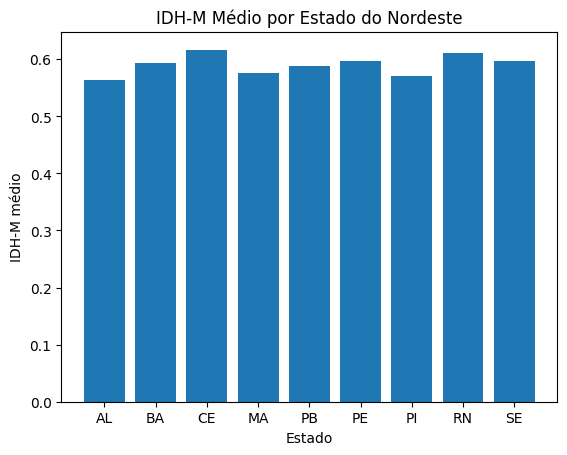

In [21]:
idhm_estado = df_nordeste.groupby(df_nordeste['Município'].str.extract(r'\((\w{2})\)')[0])['IDH-M'].mean()
plt.bar(idhm_estado.index, idhm_estado.values)
plt.title('IDH-M Médio por Estado do Nordeste')
plt.xlabel('Estado')
plt.ylabel('IDH-M médio')
plt.show()


Podemos Ver que a Média de IDH-M dos Estados Do Nordeste é Bem Equiparada, sem Grandes Diferenças entre eles

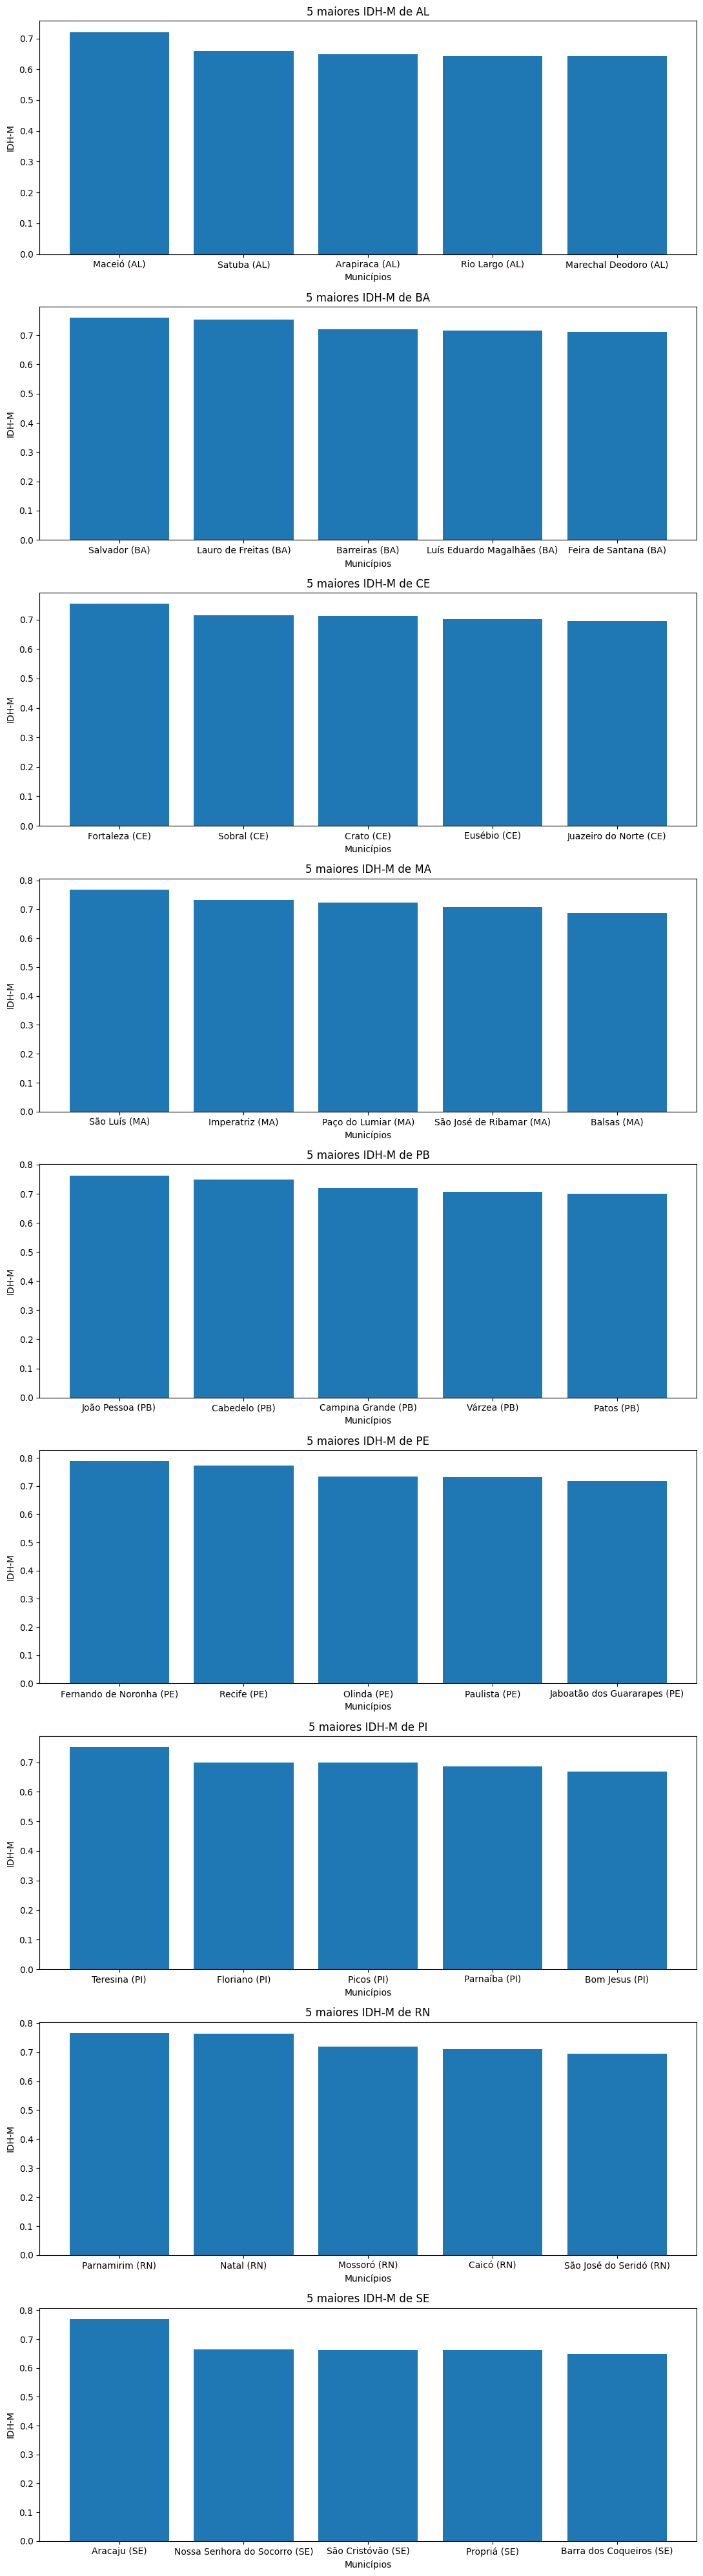

In [22]:
top5_idh_estado = df_nordeste.groupby(['Estado', 'Município'])['IDH-M'].max().groupby('Estado').nlargest(5)

fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(11, 40))

for i, (estado, data) in enumerate(top5_idh_estado.groupby(level=0)):
    ax = axes[i]
    ax.bar(data.index.get_level_values(2), data.values)
    ax.set_title(f'5 maiores IDH-M de {estado}')
    ax.set_xlabel('Municípios')
    ax.set_ylabel('IDH-M')

plt.tight_layout()
plt.show()

###### Inferências e Conclusão

* Embora a Bahia tenha mais Municípios entre os 50 maiores IDH-M do Nordeste, ela não tem uma Média de Idh elevada
* O Ceará é o Estado Com a Maior Média de Idh do Nordeste
* O Piauí é o Estado com mais municípios entre os 50 Piores IDH-M do Nordeste e também é um dos Piores na Média Estadual
* Alagoas é o Estado com a Pior Média de IDH do Nordeste
* O Nordeste tem 99.22% dos Municípios com IDH Médio
* Apenas 0.78% Dos Municípios Nordestinos tem IDH Baixo
* A Região Nordeste NÂO tem Municipios com IDH Alto
* A Média do IDH-M dos Municípios do Nordeste é 0.590